In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

import util_functions as fs
import imp
imp.reload(fs)

import time

%matplotlib inline

In [3]:
#Load sheet
sheets = fs.get_images('./data/Tab_Butterfly-Waltz-Ukulele', resize_factor=0.5, threshold=200)

>>> Folder : ./data/Tab_Butterfly-Waltz-Ukulele : 2 files
01 : ./data/Tab_Butterfly-Waltz-Ukulele/p1.jpg : (2339, 1653)
02 : ./data/Tab_Butterfly-Waltz-Ukulele/p2.jpg : (2339, 1653)
>>> Resize factor : x0.5 : (2339, 1653)->(1170, 826)
>>> Inverse binary thresholding with threshold value 200


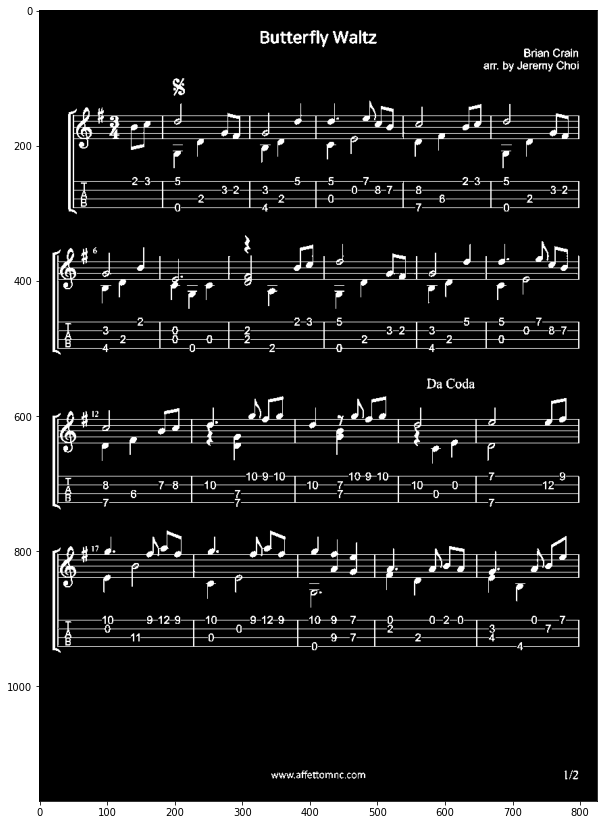

In [4]:
fs.plot_single_image(sheets[0], off_axis=False)

>>> File : ./data/symbols/treble_clef.png
01 : ./data/symbols/treble_clef.png : (982, 354)
>Inverse binary thresholding with Otsu's method


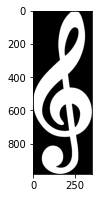

In [5]:
#Load Symbol(sample 1)
#symbols = cv2.imread('./data/symbols/treble_clef.png', cv2.IMREAD_GRAYSCALE)
symbol = fs.get_images('./data/symbols/treble_clef.png')
fs.plot_single_image(symbol, figsize=(3,3), off_axis=False)

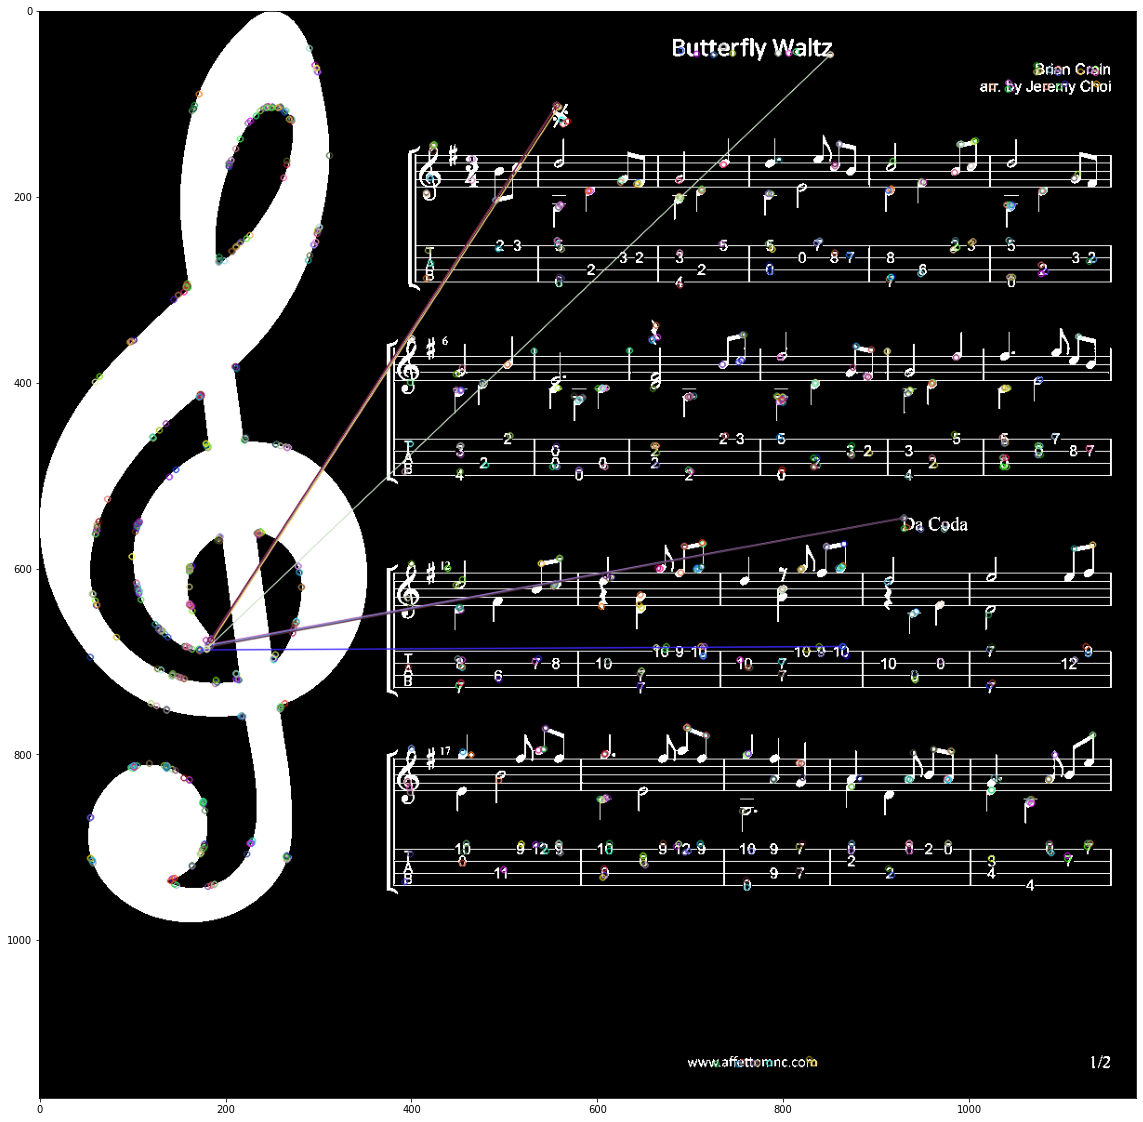

In [6]:
#Brute-force matching : ORB descriptor
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(symbol, None)
kp2, des2 = orb.detectAndCompute(sheets[0], None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img_compare = cv2.drawMatches(symbol, kp1, sheets[0], kp2, matches[:10], None)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
ax.imshow(img_compare)
plt.show()

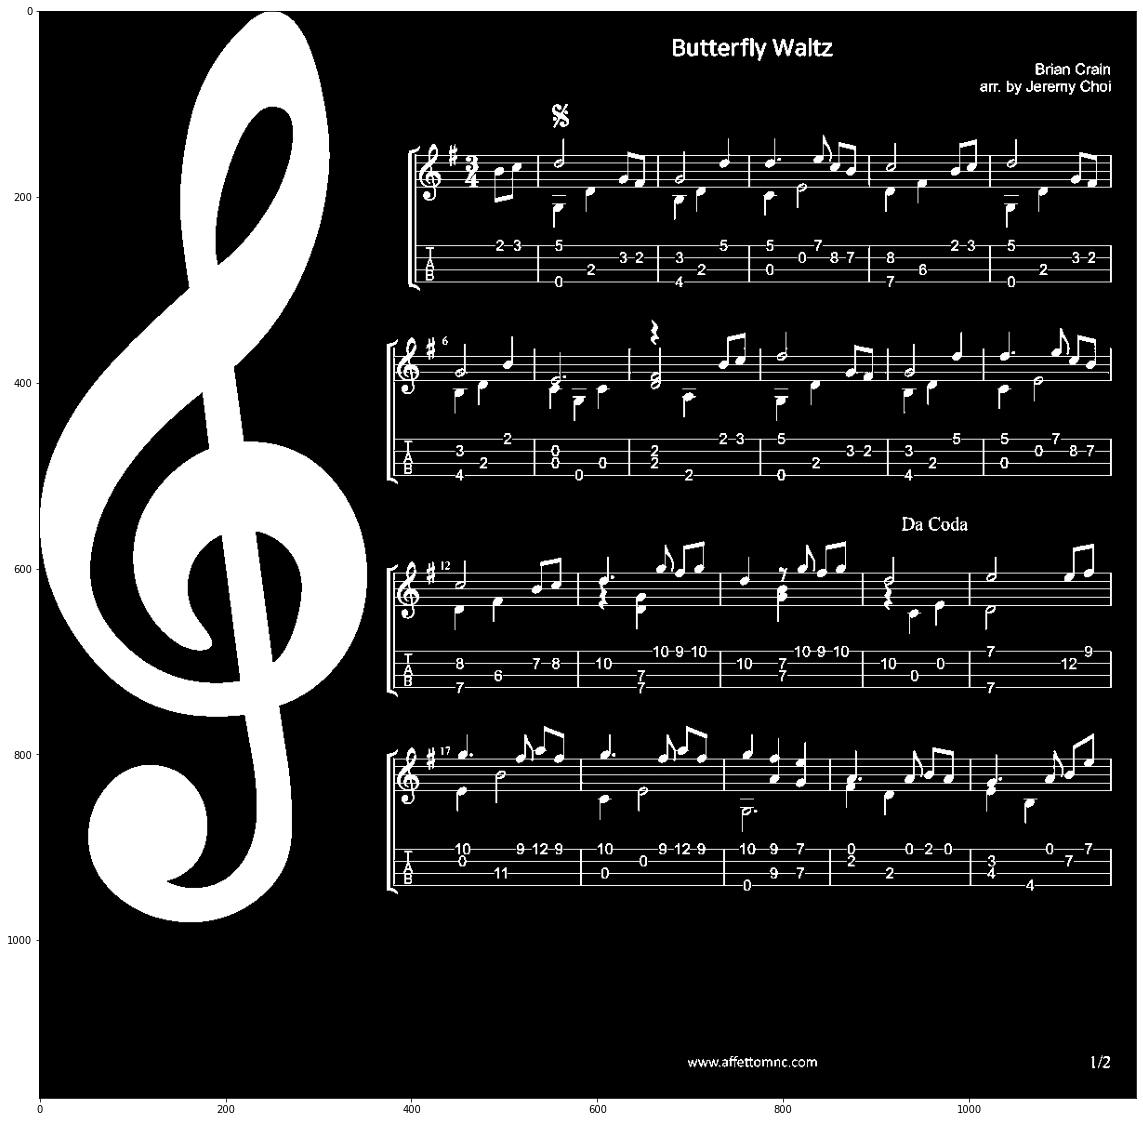

In [10]:
#Brute-force matching : SIFT descriptor

sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(symbol, None)
kp2, des2 = sift.detectAndCompute(sheets[0], None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])

img_compare = cv2.drawMatchesKnn(symbol, kp1, sheets[0], kp2, good, None, flags=2)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
plt.imshow(img_compare)
plt.show()